# Making ME baselines

In [1]:
from qdax.utils.plotting import plot_map_elites_results
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
from IPython.display import clear_output

/home/paul/miniconda3/envs/gpjax_env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/paul/miniconda3/envs/gpjax_env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/paul/miniconda3/envs/gpjax_env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/paul/miniconda3/envs/gpjax_env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_k

In [2]:
#@title QD Training Definitions Fields
#@markdown ---
batch_size = 100 #@param {type:"number"}
env_name = 'pointmaze' #@param['ant_uni', 'hopper_uni', 'walker2d_uni', 'halfcheetah_uni', 'humanoid_uni', 'ant_omni', 'humanoid_omni']
# env_name = 'pointmaze'#@param['ant_uni', 'hopper_uni', 'walker2d_uni', 'halfcheetah_uni', 'humanoid_uni', 'ant_omni', 'humanoid_omni']
episode_length = 1000 #@param {type:"integer"}p
num_iterations = 100 #@param {type:"integer"}
seed = 42 #@param {type:"integer"}
policy_hidden_layer_sizes = (64, 64) #@param {type:"raw"}
# iso_sigma = 0.005 #@param {type:"number"}
# line_sigma = 0.05 #@param {type:"number"}
num_init_cvt_samples = 50000 #@param {type:"integer"}
num_centroids = 1024 #@param {type:"integer"}
# num_centroids = 8192 #@param {type:"integer"}
min_bd = 0.0 #@param {type:"number"}
max_bd = 1.0 #@param {type:"number"}
#@markdown ---

plot_maze = False
robert = False

if env_name == "pointmaze":
    min_bd = -1.0
    episode_length = 100
    plot_maze = True

if env_name == "antmaze":
    min_bd, max_bd = [-5, 40]
    episode_length = 250
    plot_maze = False

if robert:
    policy_hidden_layer_sizes = (32,) * 4
    activation = "tanh"
else:
    policy_hidden_layer_sizes = (64, 64)
    activation = "relu"

print(policy_hidden_layer_sizes)

(64, 64)


In [3]:
# As a dict
config = {
    "batch_size": batch_size,
    "env_name": env_name,
    "episode_length": episode_length,
    "num_iterations": num_iterations,
    "seed": seed,
    "policy_hidden_layer_sizes": policy_hidden_layer_sizes,
    "num_init_cvt_samples": num_init_cvt_samples,
    "num_centroids": num_centroids,
    "min_bd": min_bd,
    "max_bd": max_bd,
    "activation": activation,
}

In [4]:
import qdax.utils.algo_factory as factory_module

import importlib
importlib.reload(factory_module)

MEFactory = factory_module.MEFactory

## Vanilla MAP-Elites

In [5]:
factory = MEFactory(config)
factory

MEFactory(None)

In [6]:
factory.get_mapelites()
clear_output()

factory

MEFactory(MAP-Elites)

In [7]:
repertoire, all_metrics = factory.run()

100%|██████████| 2/2 [00:04<00:00,  2.28s/it]


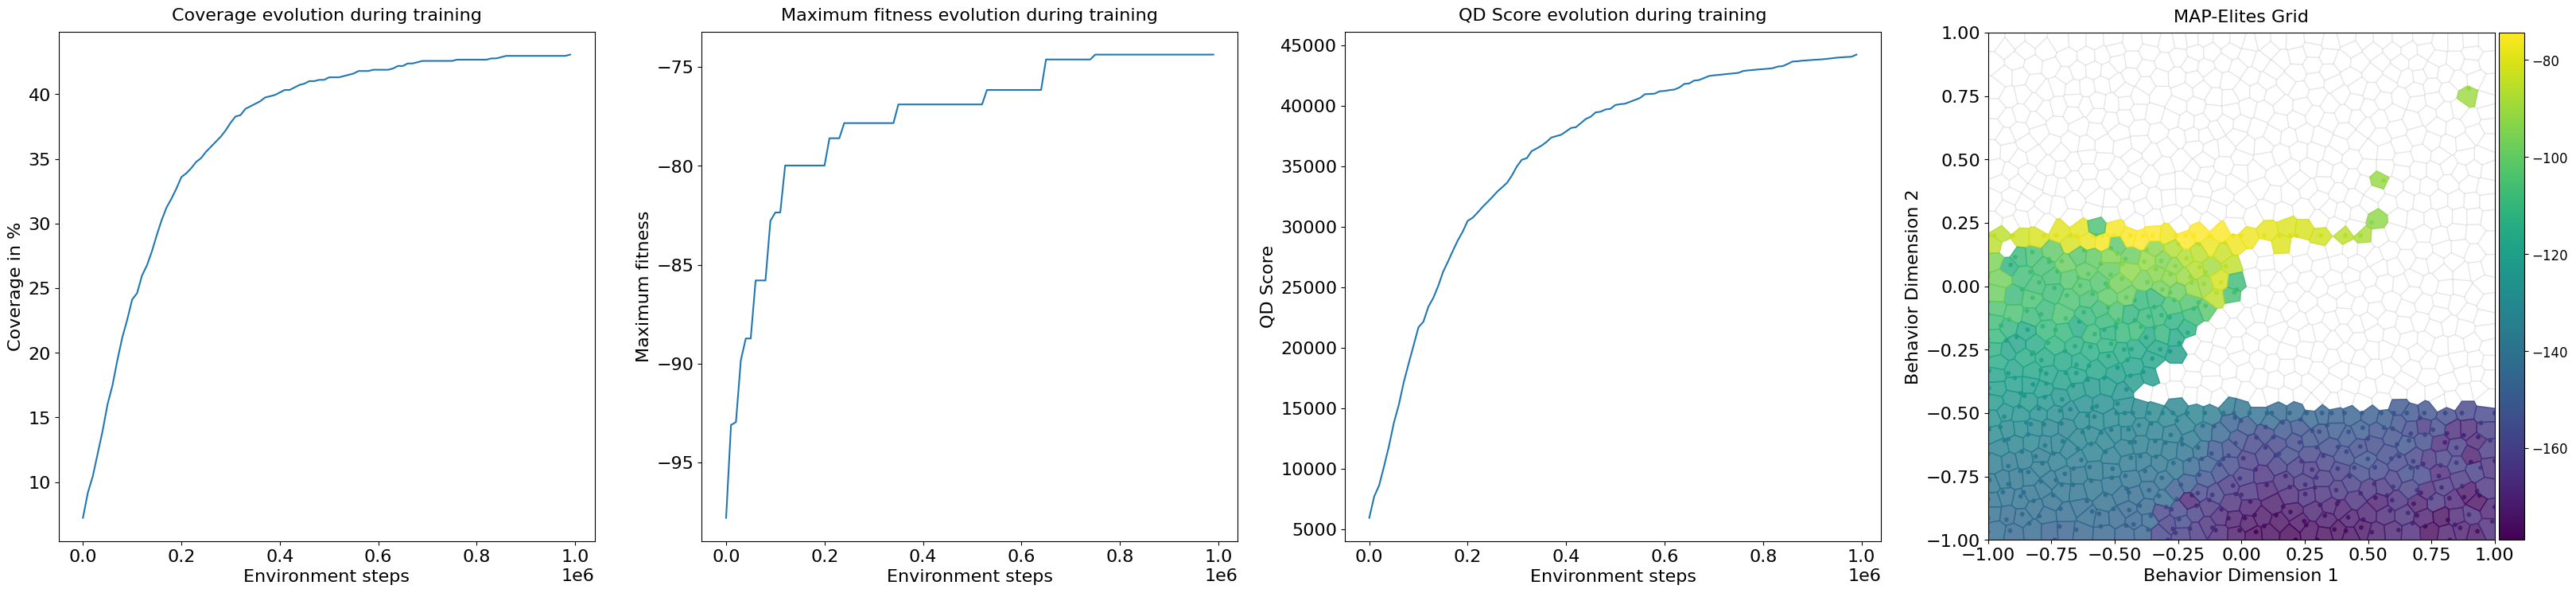

In [8]:
env_steps = all_metrics["env_steps"]
fig, axes = plot_map_elites_results(
    env_steps=env_steps, 
    metrics=all_metrics, 
    repertoire=repertoire, 
    min_bd=min_bd, 
    max_bd=max_bd
    )

plt.show()

## PGA-ME

In [44]:
import qdax.utils.algo_factory as factory_module

import importlib
importlib.reload(factory_module)

MEFactory = factory_module.MEFactory

In [45]:
factory = MEFactory(config)
factory

MEFactory(None)

In [46]:
factory.get_pgame()
clear_output()

factory

/home/paul/Dev/QDax/qdax/core/custom_repertoire_mapelites.py:67: UserWarning: This type of repertoire does not store the extra scores computed by the scoring function
  repertoire = self.repertoire_type.init(
2023-06-29 13:54:03.357217: E external/xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  %pad.47 = f32[2000000,13]{1,0} pad(f32[1000000,13]{1,0} %broadcast.10, f32[] %constant.9), padding=1000000_0x0_0, metadata={op_name="jit(init)/jit(main)/jit(state_update)/jit(state_update)/jit(insert)/jit(_roll_dynamic)/concatenate[dimension=0]" source_file="/home/paul/Dev/QDax/qdax/core/neuroevolution/buffers/buffer.py" source_line=393}

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to f

MEFactory(PGA-ME)

In [47]:
repertoire, all_metrics = factory.run()

100%|██████████| 2/2 [00:26<00:00, 13.18s/it]


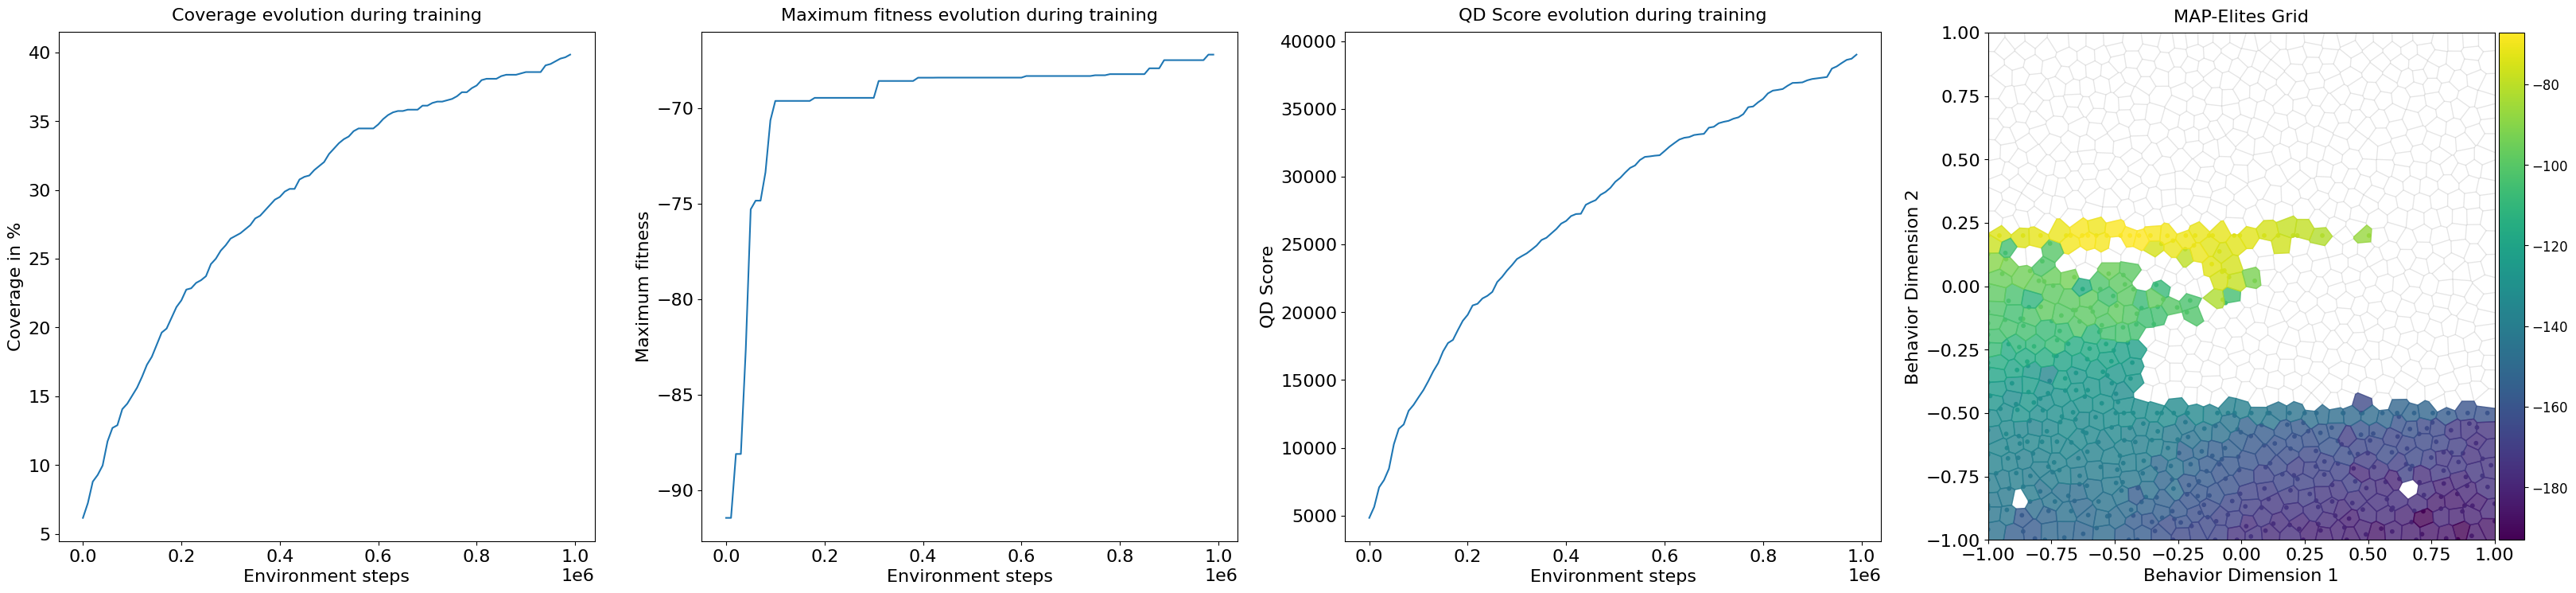

In [49]:
env_steps = all_metrics["env_steps"]
fig, axes = plot_map_elites_results(
    env_steps=env_steps, 
    metrics=all_metrics, 
    repertoire=repertoire, 
    min_bd=min_bd, 
    max_bd=max_bd
    )

plt.show()

## CMA-ME

In [9]:
import qdax.utils.algo_factory as factory_module

import importlib
importlib.reload(factory_module)

MEFactory = factory_module.MEFactory

In [10]:
factory = MEFactory(config)
factory

MEFactory(None)

In [11]:
factory.get_cmame()
clear_output()

factory

MEFactory(CMA-ME)

In [12]:
repertoire, all_metrics = factory.run()

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


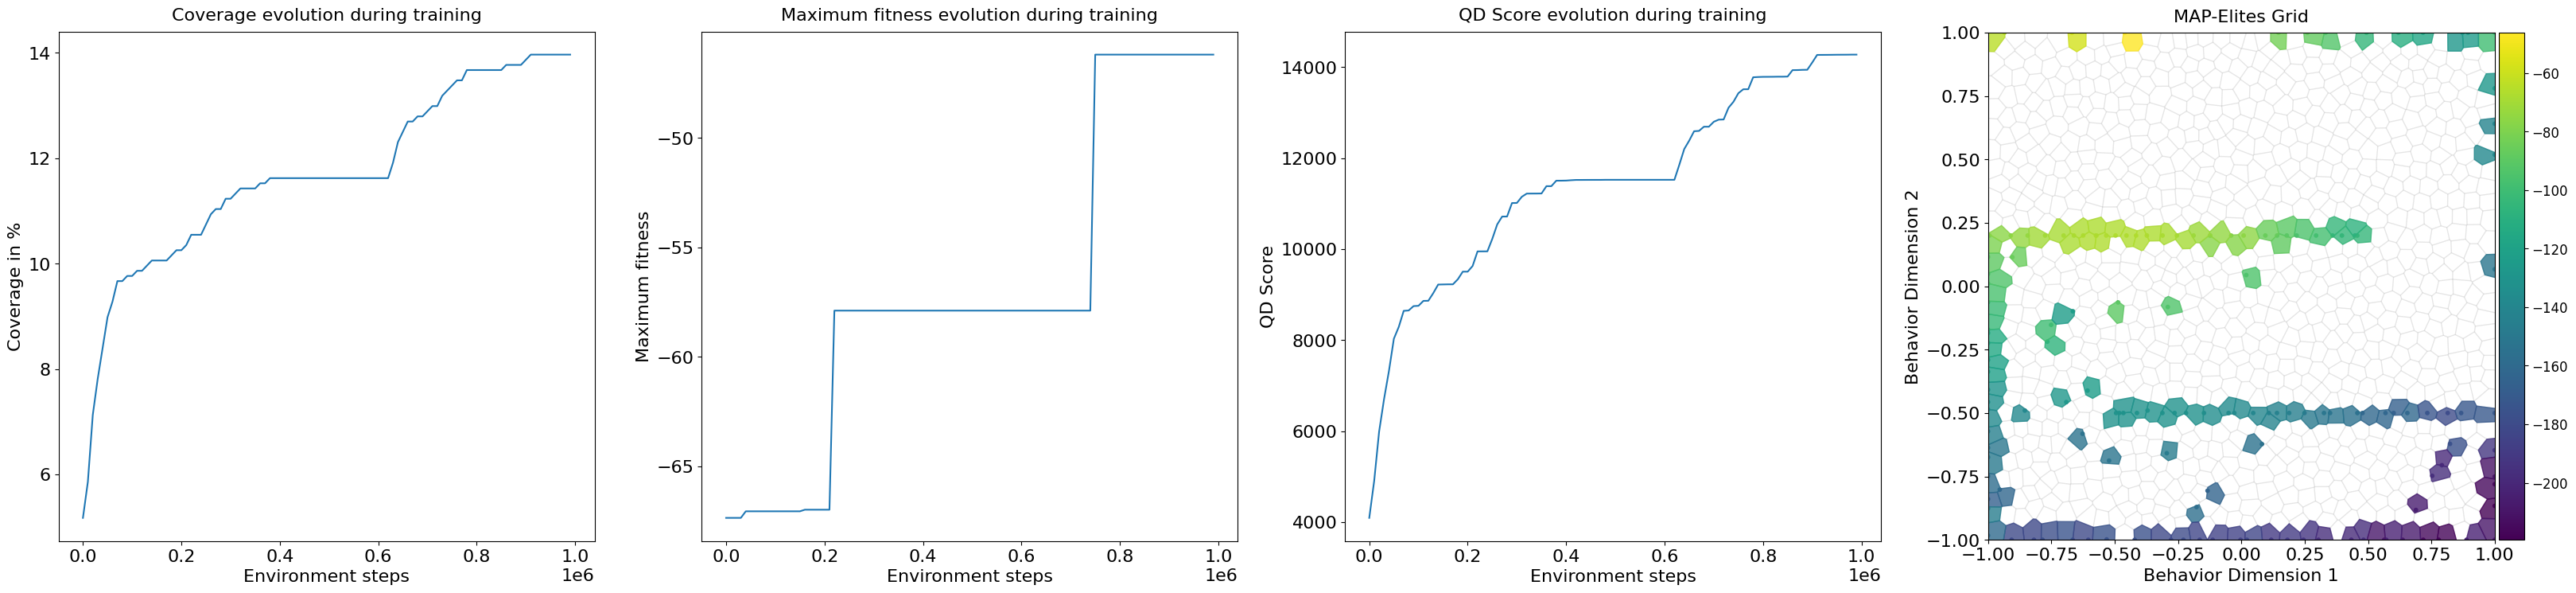

In [13]:
env_steps = all_metrics["env_steps"]
fig, axes = plot_map_elites_results(
    env_steps=env_steps, 
    metrics=all_metrics, 
    repertoire=repertoire, 
    min_bd=min_bd, 
    max_bd=max_bd
    )

plt.show()

## ME-ES

In [56]:
import qdax.utils.algo_factory as factory_module

import importlib
importlib.reload(factory_module)

MEFactory = factory_module.MEFactory

In [57]:
factory = MEFactory(config)
factory

MEFactory(None)

In [58]:
factory.get_mees()
clear_output()

factory

/home/paul/Dev/QDax/qdax/utils/algo_factory.py:297: UserWarning: MEES only works with batch_size=1 (ES center). Setting sample_number=batch_size and batch_size=1.
  


ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())

In [ ]:
repertoire, all_metrics = factory.run()

100%|██████████| 2/2 [00:04<00:00,  2.09s/it]


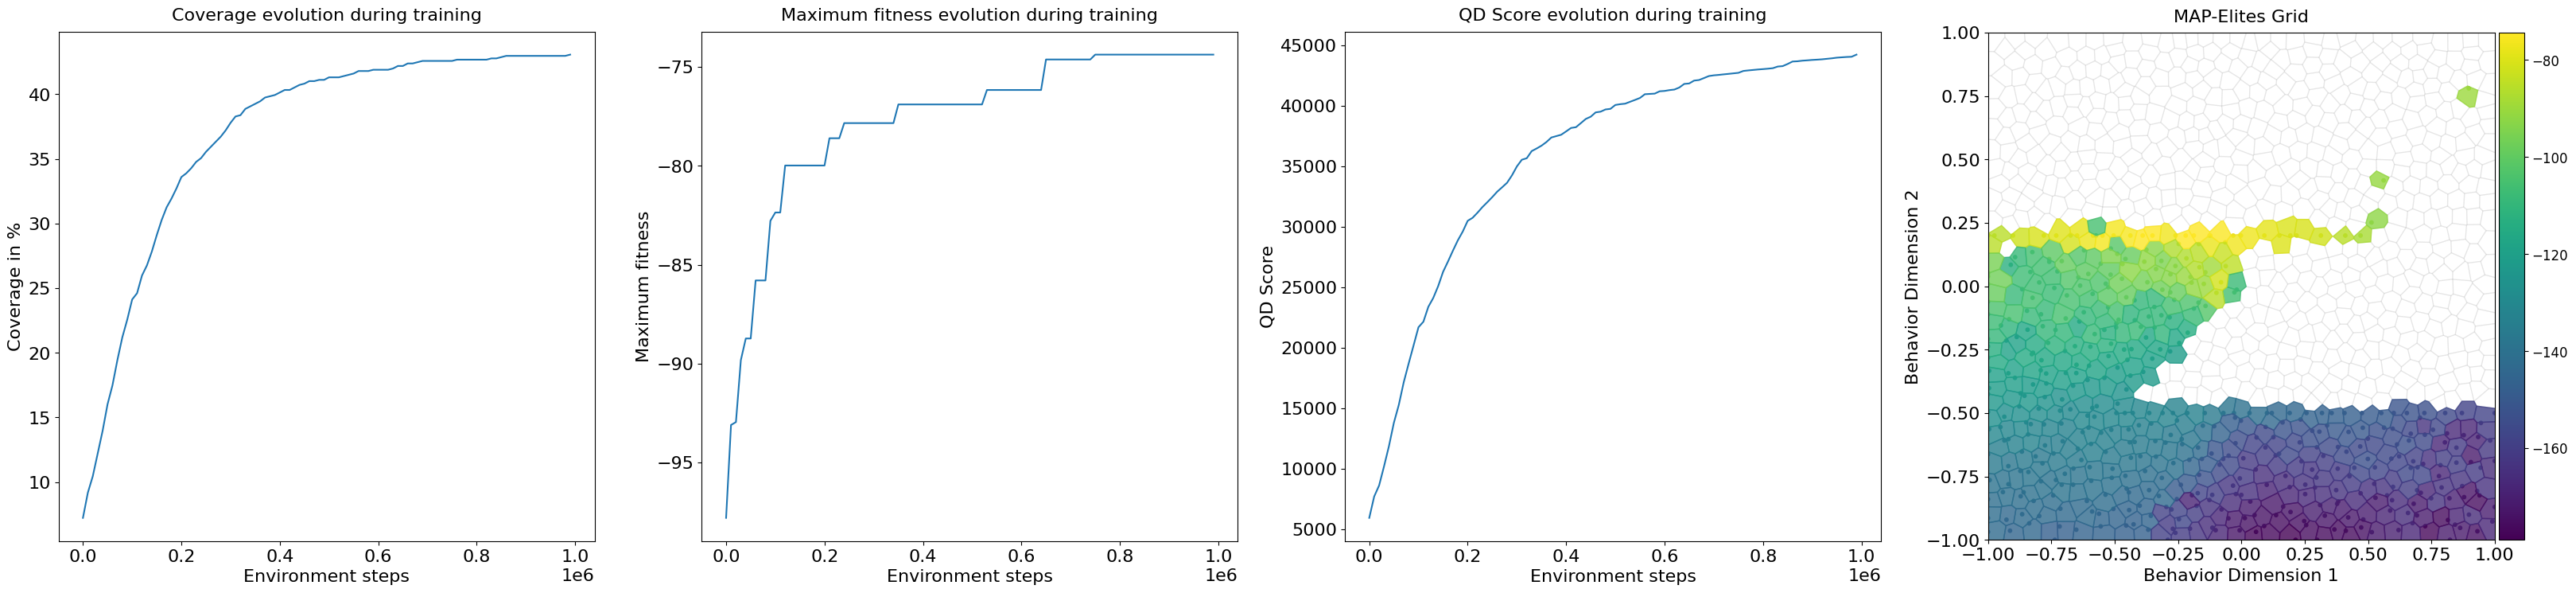

In [ ]:
env_steps = all_metrics["env_steps"]
fig, axes = plot_map_elites_results(
    env_steps=env_steps, 
    metrics=all_metrics, 
    repertoire=repertoire, 
    min_bd=min_bd, 
    max_bd=max_bd
    )

plt.show()